<a href="https://colab.research.google.com/github/garfield-gray/DCIM/blob/main/DCIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the name of God

 Implementation of DCIM 

 Author: Abbas Mohamadiyan (Garfield Gray=)

In [34]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from numpy.linalg import svd
from scipy.linalg import hankel

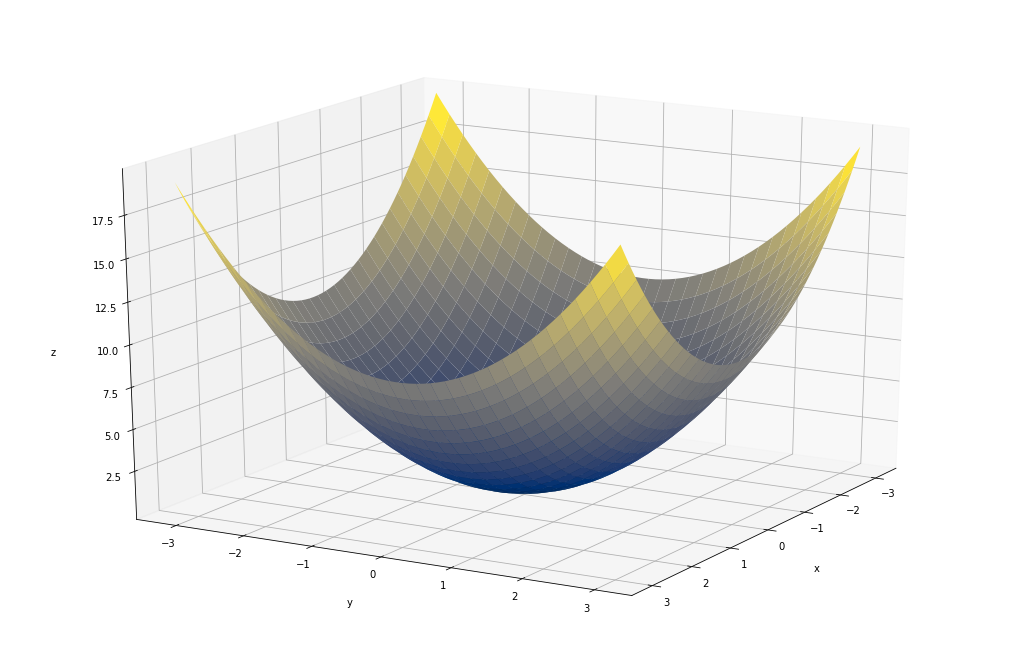

In [22]:
# building up MN samples of s(m,n)


x = np.arange(-np.pi, np.pi, 0.1)
y = np.arange(-np.pi, np.pi, 0.1)
M = len(x)
N = len(y)
K = int(np.floor(M/2))  #assuming that pencil parameter's better to be half of samples(like what we had in GPOF)
L = int(np.floor(N/2))

X, Y = np.meshgrid(x, y)

s = (X**2+Y**2)

"""plot"""
#                          (length, width)
fig = plt.figure(figsize = (18,12))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, Y, s, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)


#           (hight, long)
ax.view_init(20, 30)
plt.show()



In [23]:
# building up Fms and Fe matrices
Fms = []
for i in range(M):
  #              (first column,     last row)
  Fms.append(hankel(s[i][0:L],s[i][L-1:N]))


In [24]:
Fe_rows = []
for i in range(K):
  Fe_rows.append(np.block(Fms[i:M-K+i+1]))
  

In [25]:
Fe = np.vstack(Fe_rows) # it's true inshallah=)

In [46]:
a = np.array([[3,2,2],[2,3,-2]])
u,s,vh = svd(a, full_matrices=False)

In [49]:
vh

array([[-7.07106781e-01, -7.07106781e-01, -6.47932334e-17],
       [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01]])